In [1]:
import os
from os.path import join

import numpy as np
import pandas as pd

import tensorflow as tf
import keras
from keras import layers, Input, models
from keras.utils import to_categorical
from keras.wrappers.scikit_learn import KerasClassifier 
from sklearn.model_selection import KFold 
from sklearn.model_selection import cross_val_score

from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt
from ast import literal_eval
# print(os.listdir("../project(2)"))
import warnings
warnings.filterwarnings("ignore")

In [2]:
jp = [['18', '26'],
 ['17', '26'],
 ['16', '26'],
 ['15', '26'],
 ['14', '26'],
 ['13', '26'],
 ['12', '26'],
 ['11', '26'],
 ['10', '26'],
 ['9', '26'],
 ['8', '26'],
 ['7', '26'],
 ['19', '25'],
 ['18', '25'],
 ['17', '25'],
 ['16', '25'],
 ['15', '25'],
 ['14', '25'],
 ['13', '25'],
 ['12', '25'],
 ['11', '25'],
 ['10', '25'],
 ['9', '25'],
 ['8', '25'],
 ['7', '25'],
 ['6', '25'],
 ['20', '24'],
 ['19', '24'],
 ['18', '24'],
 ['17', '24'],
 ['16', '24'],
 ['15', '24'],
 ['14', '24'],
 ['13', '24'],
 ['12', '24'],
 ['11', '24'],
 ['10', '24'],
 ['9', '24'],
 ['8', '24'],
 ['7', '24'],
 ['6', '24'],
 ['5', '24'],
 ['21', '23'],
 ['20', '23'],
 ['19', '23'],
 ['18', '23'],
 ['17', '23'],
 ['16', '23'],
 ['15', '23'],
 ['14', '23'],
 ['13', '23'],
 ['12', '23'],
 ['11', '23'],
 ['10', '23'],
 ['9', '23'],
 ['8', '23'],
 ['7', '23'],
 ['6', '23'],
 ['5', '23'],
 ['4', '23'],
 ['22', '22'],
 ['21', '22'],
 ['20', '22'],
 ['19', '22'],
 ['18', '22'],
 ['17', '22'],
 ['16', '22'],
 ['15', '22'],
 ['14', '22'],
 ['13', '22'],
 ['12', '22'],
 ['11', '22'],
 ['10', '22'],
 ['9', '22'],
 ['8', '22'],
 ['7', '22'],
 ['6', '22'],
 ['5', '22'],
 ['4', '22'],
 ['3', '22'],
 ['23', '21'],
 ['22', '21'],
 ['21', '21'],
 ['20', '21'],
 ['19', '21'],
 ['18', '21'],
 ['17', '21'],
 ['16', '21'],
 ['15', '21'],
 ['14', '21'],
 ['13', '21'],
 ['12', '21'],
 ['11', '21'],
 ['10', '21'],
 ['9', '21'],
 ['8', '21'],
 ['7', '21'],
 ['6', '21'],
 ['5', '21'],
 ['4', '21'],
 ['3', '21'],
 ['2', '21'],
 ['23', '20'],
 ['22', '20'],
 ['21', '20'],
 ['20', '20'],
 ['19', '20'],
 ['18', '20'],
 ['17', '20'],
 ['16', '20'],
 ['15', '20'],
 ['14', '20'],
 ['13', '20'],
 ['12', '20'],
 ['11', '20'],
 ['10', '20'],
 ['9', '20'],
 ['8', '20'],
 ['7', '20'],
 ['6', '20'],
 ['5', '20'],
 ['4', '20'],
 ['3', '20'],
 ['2', '20'],
 ['24', '19'],
 ['23', '19'],
 ['22', '19'],
 ['21', '19'],
 ['20', '19'],
 ['19', '19'],
 ['18', '19'],
 ['17', '19'],
 ['16', '19'],
 ['15', '19'],
 ['14', '19'],
 ['13', '19'],
 ['12', '19'],
 ['11', '19'],
 ['10', '19'],
 ['9', '19'],
 ['8', '19'],
 ['7', '19'],
 ['6', '19'],
 ['5', '19'],
 ['4', '19'],
 ['3', '19'],
 ['2', '19'],
 ['1', '19'],
 ['24', '18'],
 ['23', '18'],
 ['22', '18'],
 ['21', '18'],
 ['20', '18'],
 ['19', '18'],
 ['18', '18'],
 ['17', '18'],
 ['16', '18'],
 ['15', '18'],
 ['14', '18'],
 ['13', '18'],
 ['12', '18'],
 ['11', '18'],
 ['10', '18'],
 ['9', '18'],
 ['8', '18'],
 ['7', '18'],
 ['6', '18'],
 ['5', '18'],
 ['4', '18'],
 ['3', '18'],
 ['2', '18'],
 ['1', '18'],
 ['24', '17'],
 ['23', '17'],
 ['22', '17'],
 ['21', '17'],
 ['20', '17'],
 ['19', '17'],
 ['18', '17'],
 ['17', '17'],
 ['16', '17'],
 ['15', '17'],
 ['14', '17'],
 ['13', '17'],
 ['12', '17'],
 ['11', '17'],
 ['10', '17'],
 ['9', '17'],
 ['8', '17'],
 ['7', '17'],
 ['6', '17'],
 ['5', '17'],
 ['4', '17'],
 ['3', '17'],
 ['2', '17'],
 ['1', '17'],
 ['24', '16'],
 ['23', '16'],
 ['22', '16'],
 ['21', '16'],
 ['20', '16'],
 ['19', '16'],
 ['18', '16'],
 ['17', '16'],
 ['16', '16'],
 ['15', '16'],
 ['14', '16'],
 ['13', '16'],
 ['12', '16'],
 ['11', '16'],
 ['10', '16'],
 ['9', '16'],
 ['8', '16'],
 ['7', '16'],
 ['6', '16'],
 ['5', '16'],
 ['4', '16'],
 ['3', '16'],
 ['2', '16'],
 ['1', '16'],
 ['24', '15'],
 ['23', '15'],
 ['22', '15'],
 ['21', '15'],
 ['20', '15'],
 ['19', '15'],
 ['18', '15'],
 ['17', '15'],
 ['16', '15'],
 ['15', '15'],
 ['14', '15'],
 ['13', '15'],
 ['12', '15'],
 ['11', '15'],
 ['10', '15'],
 ['9', '15'],
 ['8', '15'],
 ['7', '15'],
 ['6', '15'],
 ['5', '15'],
 ['4', '15'],
 ['3', '15'],
 ['2', '15'],
 ['1', '15'],
 ['24', '14'],
 ['23', '14'],
 ['22', '14'],
 ['21', '14'],
 ['20', '14'],
 ['19', '14'],
 ['18', '14'],
 ['17', '14'],
 ['16', '14'],
 ['15', '14'],
 ['14', '14'],
 ['13', '14'],
 ['12', '14'],
 ['11', '14'],
 ['10', '14'],
 ['9', '14'],
 ['8', '14'],
 ['7', '14'],
 ['6', '14'],
 ['5', '14'],
 ['4', '14'],
 ['3', '14'],
 ['2', '14'],
 ['1', '14'],
 ['24', '13'],
 ['23', '13'],
 ['22', '13'],
 ['21', '13'],
 ['20', '13'],
 ['19', '13'],
 ['18', '13'],
 ['17', '13'],
 ['16', '13'],
 ['15', '13'],
 ['14', '13'],
 ['13', '13'],
 ['12', '13'],
 ['11', '13'],
 ['10', '13'],
 ['9', '13'],
 ['8', '13'],
 ['7', '13'],
 ['6', '13'],
 ['5', '13'],
 ['4', '13'],
 ['3', '13'],
 ['2', '13'],
 ['1', '13'],
 ['24', '12'],
 ['23', '12'],
 ['22', '12'],
 ['21', '12'],
 ['20', '12'],
 ['19', '12'],
 ['18', '12'],
 ['17', '12'],
 ['16', '12'],
 ['15', '12'],
 ['14', '12'],
 ['13', '12'],
 ['12', '12'],
 ['11', '12'],
 ['10', '12'],
 ['9', '12'],
 ['8', '12'],
 ['7', '12'],
 ['6', '12'],
 ['5', '12'],
 ['4', '12'],
 ['3', '12'],
 ['2', '12'],
 ['1', '12'],
 ['24', '11'],
 ['23', '11'],
 ['22', '11'],
 ['21', '11'],
 ['20', '11'],
 ['19', '11'],
 ['18', '11'],
 ['17', '11'],
 ['16', '11'],
 ['15', '11'],
 ['14', '11'],
 ['13', '11'],
 ['12', '11'],
 ['11', '11'],
 ['10', '11'],
 ['9', '11'],
 ['8', '11'],
 ['7', '11'],
 ['6', '11'],
 ['5', '11'],
 ['4', '11'],
 ['3', '11'],
 ['2', '11'],
 ['1', '11'],
 ['24', '10'],
 ['23', '10'],
 ['22', '10'],
 ['21', '10'],
 ['20', '10'],
 ['19', '10'],
 ['18', '10'],
 ['17', '10'],
 ['16', '10'],
 ['15', '10'],
 ['14', '10'],
 ['13', '10'],
 ['12', '10'],
 ['11', '10'],
 ['10', '10'],
 ['9', '10'],
 ['8', '10'],
 ['7', '10'],
 ['6', '10'],
 ['5', '10'],
 ['4', '10'],
 ['3', '10'],
 ['2', '10'],
 ['1', '10'],
 ['24', '9'],
 ['23', '9'],
 ['22', '9'],
 ['21', '9'],
 ['20', '9'],
 ['19', '9'],
 ['18', '9'],
 ['17', '9'],
 ['16', '9'],
 ['15', '9'],
 ['14', '9'],
 ['13', '9'],
 ['12', '9'],
 ['11', '9'],
 ['10', '9'],
 ['9', '9'],
 ['8', '9'],
 ['7', '9'],
 ['6', '9'],
 ['5', '9'],
 ['4', '9'],
 ['3', '9'],
 ['2', '9'],
 ['1', '9'],
 ['24', '8'],
 ['23', '8'],
 ['22', '8'],
 ['21', '8'],
 ['20', '8'],
 ['19', '8'],
 ['18', '8'],
 ['17', '8'],
 ['16', '8'],
 ['15', '8'],
 ['14', '8'],
 ['13', '8'],
 ['12', '8'],
 ['11', '8'],
 ['10', '8'],
 ['9', '8'],
 ['8', '8'],
 ['7', '8'],
 ['6', '8'],
 ['5', '8'],
 ['4', '8'],
 ['3', '8'],
 ['2', '8'],
 ['1', '8'],
 ['23', '7'],
 ['22', '7'],
 ['21', '7'],
 ['20', '7'],
 ['19', '7'],
 ['18', '7'],
 ['17', '7'],
 ['16', '7'],
 ['15', '7'],
 ['14', '7'],
 ['13', '7'],
 ['12', '7'],
 ['11', '7'],
 ['10', '7'],
 ['9', '7'],
 ['8', '7'],
 ['7', '7'],
 ['6', '7'],
 ['5', '7'],
 ['4', '7'],
 ['3', '7'],
 ['2', '7'],
 ['23', '6'],
 ['22', '6'],
 ['21', '6'],
 ['20', '6'],
 ['19', '6'],
 ['18', '6'],
 ['17', '6'],
 ['16', '6'],
 ['15', '6'],
 ['14', '6'],
 ['13', '6'],
 ['12', '6'],
 ['11', '6'],
 ['10', '6'],
 ['9', '6'],
 ['8', '6'],
 ['7', '6'],
 ['6', '6'],
 ['5', '6'],
 ['4', '6'],
 ['3', '6'],
 ['2', '6'],
 ['22', '5'],
 ['21', '5'],
 ['20', '5'],
 ['19', '5'],
 ['18', '5'],
 ['17', '5'],
 ['16', '5'],
 ['15', '5'],
 ['14', '5'],
 ['13', '5'],
 ['12', '5'],
 ['11', '5'],
 ['10', '5'],
 ['9', '5'],
 ['8', '5'],
 ['7', '5'],
 ['6', '5'],
 ['5', '5'],
 ['4', '5'],
 ['3', '5'],
 ['21', '4'],
 ['20', '4'],
 ['19', '4'],
 ['18', '4'],
 ['17', '4'],
 ['16', '4'],
 ['15', '4'],
 ['14', '4'],
 ['13', '4'],
 ['12', '4'],
 ['11', '4'],
 ['10', '4'],
 ['9', '4'],
 ['8', '4'],
 ['7', '4'],
 ['6', '4'],
 ['5', '4'],
 ['4', '4'],
 ['20', '3'],
 ['19', '3'],
 ['18', '3'],
 ['17', '3'],
 ['16', '3'],
 ['15', '3'],
 ['14', '3'],
 ['13', '3'],
 ['12', '3'],
 ['11', '3'],
 ['10', '3'],
 ['9', '3'],
 ['8', '3'],
 ['7', '3'],
 ['6', '3'],
 ['5', '3'],
 ['19', '2'],
 ['18', '2'],
 ['17', '2'],
 ['16', '2'],
 ['15', '2'],
 ['14', '2'],
 ['13', '2'],
 ['12', '2'],
 ['11', '2'],
 ['10', '2'],
 ['9', '2'],
 ['8', '2'],
 ['7', '2'],
 ['6', '2'],
 ['18', '1'],
 ['17', '1'],
 ['16', '1'],
 ['15', '1'],
 ['14', '1'],
 ['13', '1'],
 ['12', '1'],
 ['11', '1'],
 ['10', '1'],
 ['9', '1'],
 ['8', '1'],
 ['7', '1']]

In [3]:
cnt = []
for i in range(1,27):
    temp = 0
    for num in jp:
        if int(num[1]) == i :
            temp += 1
    cnt.append(temp)   

In [4]:
pad = []
for i in cnt:
    temp = np.pad([1]*i, ((26-i)//2,(26-i)//2), 'constant', constant_values=0)
    pad.append(list(temp))

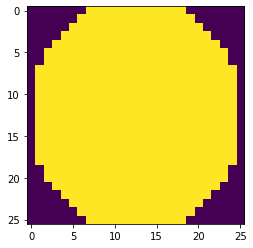

In [5]:
# plt.xticks(range(1,27))
# plt.yticks(range(0,30,5))
plt.imshow(pad)

In [6]:
xy_list = pd.read_csv("xylist.csv",index_col=0, converters = {'defect':literal_eval})

In [16]:
list(xy_list[900:]["defect"])

[[],
 [],
 [(15, 6)],
 [],
 [(7, 21), (22, 1)],
 [(0, 3)],
 [],
 [(9, 14)],
 [(6, 16)],
 [(23, 12), (9, 26)],
 [(22, 22)],
 [(17, 21), (13, 6)],
 [(17, 24), (13, 3)],
 [(23, 15)],
 [],
 [(14, 0), (12, 19)],
 [],
 [],
 [(23, 21), (7, 6)],
 [],
 [],
 [(15, 7), (7, 20)],
 [(1, 24)],
 [],
 [(15, 0), (17, 22)],
 [],
 [],
 [],
 [],
 [(0, 0)],
 [],
 [],
 [(10, 14)],
 [],
 [(18, 8)],
 [],
 [],
 [(7, 21)],
 [(3, 1), (20, 7)],
 [(12, 15), (0, 12)],
 [],
 [],
 [(8, 12), (21, 23)],
 [(10, 15)],
 [(17, 13), (3, 16)],
 [(23, 17)],
 [(23, 17), (23, 17)],
 [(23, 16)],
 [(24, 16)],
 [(24, 17), (24, 17)],
 [],
 [(23, 7)],
 [(17, 16)],
 [],
 [(7, 15), (19, 19)],
 [],
 [(16, 11)],
 [(18, 14), (5, 12)],
 [],
 [(8, 2), (2, 19)],
 [(15, 8)],
 [(17, 16)],
 [(3, 10)],
 [(7, 7), (10, 23)],
 [(1, 8)],
 [(4, 16)],
 [],
 [],
 [(4, 23), (21, 2)],
 [(12, 25), (5, 8)],
 [(6, 10), (20, 20)],
 [],
 [],
 [(5, 17)],
 [(22, 12), (6, 9)],
 [(9, 25), (3, 0)],
 [],
 [],
 [],
 [(7, 24), (13, 24)],
 [],
 [(12, 0)],
 [(9, 20)],

In [29]:
# nppad = np.array(pad).reshape(1,26,26)

In [7]:
sce = pd.read_table('Klarf_scenario.txt')
sce['defect'] = xy_list
sce.head(2)

,Lot-ID,Wafer-ID,ResultTimestamp,Machine-ID,Step-ID,Device-ID,class,defect
0,AC10002SA,AC10002-01,01-01-23 04:10:00,A3D02,Metrology-Type-01,AC1,0,"[(24, 20)]"
1,AS10001T,AS10001-01,01-01-23 04:12:49,A3D01,Metrology-Type-01,AS1,0,"[(15, 17)]"


In [19]:
sce[sce["Wafer-ID"]=='AS10003-01']

,Lot-ID,Wafer-ID,ResultTimestamp,Machine-ID,Step-ID,Device-ID,class,defect
24,AS10003SA,AS10003-01,01-01-23 09:12:28,A3D02,Metrology-Type-01,AS1,1,[]


In [35]:
# sce[sce["class"]==3]['Device-ID'].value_counts()
list(sce[sce["class"]==3]['defect'])
sce[sce["class"]==5]

,Lot-ID,Wafer-ID,ResultTimestamp,Machine-ID,Step-ID,Device-ID,class,defect
502,AS10039T2,AS10039-01,01-05-23 13:51:55,A3D02,Metrology-Type-01,AS1,5,"[(9, 19), (10, 9)]"
504,AS10039T2,AS10039-02,01-05-23 14:17:17,A3D02,Metrology-Type-01,AS1,5,"[(6, 13), (12, 23)]"
506,AS10039T2,AS10039-03,01-05-23 14:34:32,A3D02,Metrology-Type-01,AS1,5,[]
508,AS10039T2,AS10039-04,01-05-23 15:06:41,A3D02,Metrology-Type-01,AS1,5,"[(20, 12), (14, 17)]"
510,AS10039T2,AS10039-05,01-05-23 15:32:29,A3D02,Metrology-Type-01,AS1,5,"[(23, 16), (23, 9)]"
...,...,...,...,...,...,...,...,...
714,AS10038T1,AS10038-21,01-07-23 09:29:41,A3D01,Metrology-Type-01,AS1,5,"[(1, 16)]"
716,AS10038T1,AS10038-22,01-07-23 09:59:56,A3D01,Metrology-Type-01,AS1,5,"[(1, 16)]"
719,AS10038T1,AS10038-23,01-07-23 10:32:30,A3D01,Metrology-Type-01,AS1,5,"[(1, 16), (1, 16)]"
721,AS10038T1,AS10038-24,01-07-23 10:52:27,A3D01,Metrology-Type-01,AS1,5,"[(2, 16), (2, 16)]"


In [8]:
machine1 = sce[sce['Machine-ID']=='A3D01']
machine2 = sce[sce['Machine-ID']=='A3D02']
print( len(machine1), len(machine2))

500 500


In [40]:
#n개의 de 리스트 만들기
n=3 
for li in range(1,n+1):
    globals()["de{}".format(li)] = []


In [45]:
#n개의 de 리스트 만들기 값도 포함
n=3 
for li in range(1,n+1):
    globals()["de{}".format(li)] = machine1.loc[machine1.index[li],'defect']


In [51]:
def cal_dist(x,y):
    return ( (y[0]-x[0])**2 + (y[1]-x[1])**2 )**(1/2)

In [9]:
from scipy.spatial import distance

In [13]:
# for i in range(len(machine1)):
# from scipy.spatial import distance
n=3
dist =2
li = []
df = machine1
for i in range(len(df)-2):
    de1 = df.loc[df.index[i],'defect']
    de2 = df.loc[df.index[i+1],'defect']
    de3 = df.loc[df.index[i+2],'defect']
    de = de1+de2+de3
    # li.append(de)
    # print(de)
    if len(de)==0:
        pass
    elif sum(distance.pdist(de,metric = 'euclidean') <= dist) >= n :
        print(de, distance.pdist(de,metric = 'euclidean'))
        break
        # print(de)
        # li.append('check')



[(6, 4), (5, 20), (8, 2), (9, 3), (8, 3)] [16.03121954  2.82842712  3.16227766  2.23606798 18.24828759 17.4642492
 17.2626765   1.41421356  1.          1.        ]


In [ ]:
#위에서 저기서 3개에 들어간것들이 de1,de2,de3 에 하나씩 있어야한다

In [88]:
len(li)

102

In [82]:
len(li)

498

In [84]:
a = []
sum(distance.pdist(a,metric = 'euclidean') <= dist)

ValueError: A 2-dimensional array must be passed.

In [31]:
# for i in range(len(machine1)):
for i in range(10):
    area = []
    for de in machine1.loc[ machine1.index[i], 'defect']:
        temp.append(de)
    print(temp)
    temp = []

        

[(15, 17)]
[]
[(16, 21)]
[(6, 14)]
[]
[]
[(5, 25), (7, 23)]
[(22, 3), (10, 8)]
[(20, 25)]
[(5, 9)]


In [ ]:
def ntimes( fir_row, n):
    

In [ ]:
def signal( row = row, r = r):
    